In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 머신러닝을 지원하는 sklearn 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
# 평가 지표들을 활용할 수 있는 metrics 모듈을 불러오기
from sklearn import metrics

### 문제정의(목표)
- 500명의 키와 몸무게, 성별 데이터를 가지고 비만도 라벨(label)을 이용해 비만을 판단하는 모델을 만들어보자잇~!

### 데이터 수집(데이터를 로드)

In [10]:
# 상대경로를 통해서 data폴더에 있는 bmi_500.csv 파일을
# 불러와서 Label이라는 컬럼을 인덱스 열로 설정
bmi = pd.read_csv("data/bmi_500.csv", index_col = "Label") 
bmi

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


### 데이터 전처리 : 전처리가 필요없는 데이터

### 탐색적 데이터 분석

In [21]:
bmi.loc[["Normal", "Obesity"]]

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Obesity,Male,146,85
Obesity,Female,188,115
Obesity,Male,173,111


In [12]:
# 전체 행의 수, 결측치가 없는 행의 수, 컬럼별 데이터 타입
# object : 범주형, int64 : 수치형(정수), float64 : 수치형(실수)
bmi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [13]:
# 기술통계를 확인
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [14]:
# index로 설정된 열의 데이터의 유니크값을 출력, (다중분류)
bmi.index.unique()  

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

- 각 비만도 등급별로 시각화

In [30]:
# 산점도를 표시하는 함수를 만들어보자잇~!
def myScatter(label, color):
    tmp = bmi.loc[label]
    # scatter : 산점도로 표시하는 명령
    plt.scatter(tmp["Weight"],         # x축 데이터 설정
                tmp["Height"],         # y축 데이터 설정
                c = color,             # 색상을 결정하는 명령
                label = label          # label로 설정하는 명령
                 )

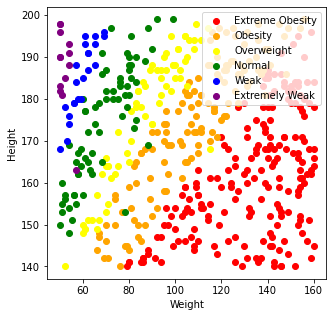

In [32]:
plt.figure(figsize=(5,5)) #그래프의 가로,세로 크기를 설정
#작성된 함수에 따라 라벨과 생상을 입력
myScatter('Extreme Obesity','red')
myScatter('Obesity','orange')
myScatter('Overweight','yellow')
myScatter('Normal','green')
myScatter('Weak','blue')
myScatter('Extremely Weak','purple')

#범례를 표시할 위치 지정
plt.legend(loc="upper right")  
plt.xlabel("Weight")
plt.ylabel("Height")     
plt.show()

- 몸무게와 키에 따른 데이터의 분포를 시각적, 직관적으로 확인해 볼 수 있음

###  모델링(모델선택, 학습, 평가)
- 1. 문제와 정답으로 데이터를 분리
- 2. 훈련세트와 평가세트로 분리
- 3. 모델 생성 및 하이퍼파라미더 조정
- 4. 학습 및 평가 실시

In [34]:
bmi = pd.read_csv("data/bmi_500.csv") 
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [35]:
bmi.head()   # 맨 위 5개의 행을 출력
             # tail() : 맨 아래 5개의 행을 출력

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [37]:
# 문제, 정답 분리
X = bmi.loc[:, "Height":"Weight"]
y = bmi.loc[:, "Label"]

In [38]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [43]:
# 훈련, 평가 세트 분리     500개 기준 7 : 3 = 350 : 150
# 훈련용 문제 데이터
X_train = X.iloc[:350, :]    
# 평가용 문제 데이터
X_test = X.iloc[350:, :]
# 훈련용 정답 데이터
y_train = y.iloc[:350]
# 평가용 정답 데이터
y_test = y.iloc[350:]

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


In [48]:
# knn 모델 로드
knn_model = KNeighborsClassifier(n_neighbors=10)

In [49]:
#knn 모델로 학습(문제, 정답)
knn_model.fit(X_train, y_train)   #훈련용 데이터

KNeighborsClassifier(n_neighbors=10)

In [50]:
pre = knn_model.predict(X_test)   #평가용 데이터
pre

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Extreme Obesity', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Normal', 'Obesity', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'E

In [52]:
# 예측값(pre)과 실제 정답을 넣고 정확도를 평가!
metrics.accuracy_score(pre, y_test)

0.9333333333333333

In [53]:
knn_model.predict([[175,75]])

array(['Normal'], dtype=object)